# COGS 108 - Final Project - Analysis of Popular Music Through Billboard Mainstays

# Overview

Have you ever looked at the Billboard Top 100 songs and wondered what elements of songs contributed to their success? In this project, we will be examining the different attributes to songs that have either been popular or have stayed popular over the past sixty years. We will also be taking a look at the gender and nationality distribution, and observe if there is a trend.

We worked on this project collaboratively by dividing work into different sections. Chuyue worked on the initial setup and the final integration, Caroline took a look at the number of hits throughout the years, Emma studied gender trends over the decades, Kelly observed the nationality of the artists on the Billboard, and Abby looked at the Spotify-provided features of the popular songs.

# Names

- Caroline Sih
- Kelly Lo
- Chuyue Zhang
- Emma Leng
- Abigail Sigler

# Group Members IDs

- A14491488
- A15435725
- A14803791
- A14545328
- A14462479

# Research Question

What are the common qualities of songs, such as musicality, and artists, such as gender and globalization, that make the Billboard Top 100 for more than one year, and do these qualities change over time?

# Background and Prior Work

   Music has always been a major part of American society, and songs often reflect current events and cultural sentiment that is present in society at the time of their creation. Although most songs that experience popularity retain it only for a short period of time, some songs have stayed culturally relevant and popular over longer periods of time, and even decades. 
   
   One of the most widely accepted measurements of musical popularity is the Billboard Top 100 chart, which releases a ranking of the best-performing songs in the United States each week. Each year, these consecutive rankings are combined to create a Top 100 chart for the entire year, which is a fair estimate of song popularity and their relevance in society for that period of time.
   
   Because music can be a response to current events and plays an important role in American society, the popularity of songs during a given year--and thus their presence on the Billboard Top 100--can be established to reflect their relevance in American culture. The common factors within these songs that persist in cultural relevance over time can be examined as an insight into American society.
   
   The Billboard Top 100 is an object of fascination in mainstream culture because it can be studied as a marker of changing gender, race, and societal dynamics. In our research we came across some interesting and relevant studies on the Hot 100. In a study conducted by Lafrance, Scheibling, Burns and Durr, the researchers found that “that black artists chart more often than white artists; black male artists have more chart success than both black and white female artists.” This information granted us an interesting starting point for our group as researchers, especially as a starting point for gender trends.

References (include links):
- Marc Lafrance, Casey Scheibling, Lori Burns & Jean Durr (2018) Race, gender, and the Billboard Top 40 charts between 1997 and 2007, Popular Music and Society, 41:5, 522-538, DOI: 10.1080/03007766.2017.1377588 [https://www.tandfonline.com/doi/full/10.1080/03007766.2017.1377588](https://www.tandfonline.com/doi/full/10.1080/03007766.2017.1377588)

# Hypothesis


We expect to see an increasing trend of globalization and diversity of gender and nationality of popular artists as time goes on since more people have access to these music, but a more explicit divide between incredibly popular, viral songs thanks to the advent of social media.

# Dataset(s)

- Dataset Name: billboardHotWeekly.csv
- Link to the dataset: https://data.world/kcmillersean/billboard-hot-100-1958-2017?fbclid=IwAR1P5o2E5IO19nJJSB5PjouSlIoIqRuPT0sDCZQrDqrj3XNm65LF-pRQNKA
- Number of observations: 317796 rows x 10 columns
- Features of this dataset include:
    - Billboard Chart URL: Link to the song on Billboard
    - WeekID: The week that it charted the Billboard
    - Song name: name of the song
    - Performer name: name of performer 
    - SongID: Concatenation of song & performer
    - Instance: Number of times a SongID has appeared on the chart after dropping off the chart for at least 1 week
    - Previous week position: Previous position of the song 
    - Peak Position: Highest position of that song in that given week
    - Weeks on Chart: Number of weeks on the chart for given week


- Dataset Name: singers_gender.csv
- Link to the dataset: https://www.kaggle.com/rkibria/singersgender
- Number of observations: 23177 rows x 3 columns
- Features of this dataset include:
    - Artist: The artist
    - Gender: Female or Male
    - Category: Their nationality, gender, and occupation


# Setup

Import all the important libraries

In [1]:
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as pltcm
import seaborn as sns
import csv
import os
from math import pi

# Configure libraries
sns.set()

# Round decimals when displaying DataFrames
pd.set_option('precision', 4)

Set up authentication for Spotify

In [2]:
# Setup Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Get authorization key to use Spotify API from developer account
client_credentials_manager = SpotifyClientCredentials('84b5738225894c76aecf0578c6ff2862', '89d0aeb4ee7c4841b5800cd068ee3f69')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Data Cleaning

Because the categories by which data was represented were very unclear and didn’t relate to the different groupings that we wanted, quite a bit of data cleaning was required to create to acquire significant data that we could use in our analysis. The “Weeks on Chart” column, for example, was not a running total, but instead reset for every “Instance” of a song on the chart. Thus, for example if a song fell off the chart and experienced a resurgence, the “Weeks on Chart” would not be cumulative. Therefore, to clean the data we created a dictionary mapping each song to, for each instance, the highest number of weeks on chart, to create a cumulative value. From this, we created a dataframe mapping those values to each year, before representing it in a bar graph.

To figure out the nationalities amongst the artists that have charted on the Billboard, we needed to incorporate a data set that had a general nationality for each artist. However, that data set had the nationality of each artist embedded in a string formatted as “[nationality]_ [gender]_[occupation]” under the column “category” for each of the artists. To extract the nationality, we had to write a function that would standardize that nationality. Then, we merged that extracted column into our original Billboard dataset. In order to visualize all the artists nationality from this past half a century, we needed to extract the year from the “Date” and we generalized it to the general decade so it would make it easier to handle such large dataset. 


---------

First, we will load the datasets and save them to dataframes

In [3]:
# load Billboard dataset
billboardWeekly = pd.read_csv('billboardHotWeekly.csv')
# load gender dataset
gender_data = pd.read_csv('singers_gender.csv', encoding = "ISO-8859-1")
gender_data.rename(columns ={'artist':'Performer'}, inplace=True)

We will clean up the gender dataset by dropping unnecessary columns.

In [4]:
# clean up gender dataset
# Remove rows that have N/A data
gender_data.dropna()
# Remove rows that have weird symbol such as "?"
gender_data = gender_data[~gender_data['Performer'].str.contains('\?')]
gender_data = gender_data[~gender_data['Performer'].str.contains('\*')]

#Remove irrelevant data such as guitarists
gender_data = gender_data[~gender_data['category'].str.contains('guitarists')]
gender_data = gender_data[~gender_data['category'].str.contains('songwriters')]

We will use the below helper functions to help cleaning data later

In [5]:
# helper functions
#Function to help clean up the category column
def standardize_race(race):
    # Make input all lowercase and drop all whitespace
    race = race.lower()
    race = race.strip()

    #Remove "singers", "male" , "female", "_"
    race = race.replace('female', '')
    race = race.replace('male', '')
    race = race.replace('singers', '')
    race = race.replace('_', '')
    race = race.replace('rappers', '')
    #Remove genre
    race = race.replace('pop', '')
    race = race.replace('rock', '')
    race = race.replace('jazz', '')
    race = race.replace('composers', '')
    race = race.replace('crooners', '')
    race = race.replace('country', '')
    race = race.replace('english', 'british')
    race = race.replace('scottish', 'british')
    race = race.replace('welsh', 'british')
    race = race.strip()
    race = race.replace('-', ' ')
    
    if len(race) > 1:
        output = race
    else:
        output = np.nan
        
    return output

#Collect year
def standardize_year(year):
    
    if "195" in year:
        out = 1950
    elif "196" in year:
        out = 1960
    elif "197" in year:
        out = 1970
    elif "198" in year:
        out = 1980
    elif "199" in year:
        out = 1990
    elif "200" in year:
        out = 2000
    elif "201" in year:
        out = 2010
    else:
        out = np.nan
    
    return out

Use the standardize_race function to clean up the nationality column

In [6]:
#Apply the transformation and drop rows with missing information
gender_data['nationality'] = gender_data['category'].apply(standardize_race)
gender_data.dropna(subset=['nationality'], inplace=True)

Create a new dataframe that is billboard and gender datasets combined

In [7]:
# New df that will contain the two dfs
merge_bboard_gender_df = pd.merge(billboardWeekly, gender_data, on='Performer')
#Clean up the merged df and get rid of the unnamed columns
merge_bboard_gender_df = merge_bboard_gender_df.loc[:, ~merge_bboard_gender_df.columns.str.contains('^Unnamed')]

#Set a new year column and standardize the year to just decades
merge_bboard_gender_df[['Month', 'Day', 'Year']] = merge_bboard_gender_df.WeekID.str.split('/', expand=True)
#Drop the month and day
merge_bboard_gender_df = merge_bboard_gender_df.drop(['Month', 'Day'], axis=1)
merge_bboard_gender_df['Decade'] = merge_bboard_gender_df['Year'].apply(standardize_year)
merge_bboard_gender_df.loc[merge_bboard_gender_df.Performer == 'Sting', 'nationality'] = 'british'
merge_bboard_gender_df.loc[merge_bboard_gender_df.Performer == 'Jimmy Somerville', 'nationality'] = 'scottish'
merge_bboard_gender_df.loc[merge_bboard_gender_df.Performer == 'Rihanna', 'nationality'] = 'american'
merge_bboard_gender_df.loc[merge_bboard_gender_df.Performer == 'Eve', 'nationality'] = 'american'

Create new dataframe, new_df, for nationality analysis purposes

In [8]:
# We will remove duplicates and count frequencies
new_df = billboardWeekly.groupby(['Performer']).size().reset_index()
new_df.rename(columns = {0: 'Frequency'}, inplace = True)
# sort the column in descending order
new_df = new_df.sort_values(by=['Frequency'], ascending = False)
# Test dropping all non-numeric rows
new_df = new_df[new_df['Frequency'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
# Merge the two df's together
new_df_nat = pd.merge(new_df, gender_data, on='Performer')
new_df_nat = new_df_nat.drop('gender', axis=1)
new_df_nat
# manually set race for people
new_df_nat.loc[new_df_nat['Performer']=='Rihanna', 'nationality'] = 'american'

Find the list of most popular songs

In [9]:
# create a new dictionary and store the max number of weeks on chart for each song/instance
dictSortIndex = {}
# number of songs that have been #1 on the list
peakList = []
for row in billboardWeekly.itertuples():
    # save to peak1 list
    if row.PeakPosition == 1:
        if not (row.SongID in peakList):
            peakList.append(row.SongID)
    # max weeks_on_chart
    if row.SongID in dictSortIndex.keys():
        if row.Instance in ((dictSortIndex[row.SongID]).keys()):
            if (dictSortIndex[row.SongID])[row.Instance] < row.WeeksOnChart:
                (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
        else:
            (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
    else:
        dictSortIndex[row.SongID] = {}
        (dictSortIndex[row.SongID])[row.Instance] = row.WeeksOnChart
        
# This is for songs that have reached the #1 on the chart
numOne = {}
for key in peakList:
    yr = billboardWeekly[billboardWeekly.SongID == key].WeekID.iloc[0].split('/')[2]
    if(yr in numOne.keys()):
        numOne[yr] += 1
    else:
        numOne[yr] = 1
        
# 1: number of songs with more than one instance on the charts
yearToInstance = {}
for key, value in dictSortIndex.items():
    if len(value.keys()) > 1:
        yr = billboardWeekly[billboardWeekly.SongID == key].WeekID.iloc[0].split('/')[2]
        if(yr in yearToInstance.keys()):
            yearToInstance[yr] += 1
        else:
            yearToInstance[yr] = 1

Now, we will set up the data structure for Spotify API data

In [10]:
#cleaning the data for input into the spotify API
df = billboardWeekly[billboardWeekly['SongID'].isin(peakList)]
df = df.drop_duplicates(subset='SongID')
sp_df = df[['Song', 'Performer', 'WeekID'].copy()]
sp_df = sp_df.reset_index(drop='True')
sp_df['Song'] = sp_df['Song'].str.replace("'",'')
sp_df['Song'] = sp_df['Song'].str.replace('"','')
sp_df['Song'] = sp_df['Song'].str.replace(',','')
sp_df['Song'] = sp_df['Song'].str.replace('&','')
sp_df['Song'] = sp_df['Song'].str.split('/').str[0]
sp_df['Song'] = sp_df['Song'].str.split('-').str[0]
sp_df['Song'] =sp_df['Song'].str.replace(r"\(.*\)","")
sp_df['Performer'] = sp_df['Performer'].str.replace('&','')
sp_df['Performer'] = sp_df['Performer'].str.replace("Featuring",'')
sp_df['Performer'] = sp_df['Performer'].str.replace("With",'')
sp_df['Performer'] = sp_df['Performer'].str.replace("And",'')
sp_df['Performer'] = sp_df['Performer'].str.replace(r"\(.*\)","")

Insert data from Spotify API

In [11]:
# add data to below sets
dance = []
energy = []
speech = []
acoustic = []
valence = []
tempo = []
for i in sp_df.index:
    artist = sp_df.loc[i,'Performer']
    track = sp_df.loc[i, 'Song']
    track_search = sp.search(q='artist:' + artist + ' track:' + track, limit=1, type='track')
    if track_search['tracks']['total'] == 0:
        track_id = 'none'
    else:
        track_id = track_search['tracks']['items'][0]['id']
    atts = sp.audio_features(track_id)
    if atts == [None]:
        dance.append('NaN')
        energy.append('NaN')
        speech.append('Nan')
        acoustic.append('NaN')
        valence.append('NaN')
        tempo.append('NaN')
    else:
        dance.append(atts[0]['danceability'])
        energy.append(atts[0]['energy'])
        speech.append(atts[0]['speechiness'])
        acoustic.append(atts[0]['acousticness'])
        valence.append(atts[0]['valence'])
        tempo.append(atts[0]['tempo'])

# set the dataframe with corresponding data
sp_df['danceability'] = dance
sp_df['energy'] = energy
sp_df['speechiness'] = speech
sp_df['acousticness'] = acoustic
sp_df['valence'] = valence
sp_df['tempo'] = tempo
sp_df = sp_df[sp_df['danceability'] != 'NaN' ]
sp_df['WeekID'] = sp_df['WeekID'].str[-4:-1]

Insert Spotify data by decades

In [27]:
# music by decades
fifties = sp_df.loc[sp_df['WeekID'] == '195']
sixties = sp_df.loc[sp_df['WeekID'] == '196']
seventies = sp_df.loc[sp_df['WeekID'] == '197']
eighties = sp_df.loc[sp_df['WeekID'] == '198']
nineties = sp_df.loc[sp_df['WeekID'] == '199']
oughts = sp_df.loc[sp_df['WeekID'] == '200']
tens = sp_df.loc[sp_df['WeekID'] == '201']

dance50 = fifties['danceability'].mean()
energy50 = fifties['energy'].mean()
speech50 = fifties['speechiness'].mean()
acoustic50 = fifties['acousticness'].mean()
valence50 = fifties['valence'].mean()

dance60 = sixties['danceability'].mean()
energy60 = sixties['energy'].mean()
speech60 = sixties['speechiness'].mean()
acoustic60 = sixties['acousticness'].mean()
valence60 = sixties['valence'].mean()

dance70 = seventies['danceability'].mean()
energy70 = seventies['energy'].mean()
speech70 = seventies['speechiness'].mean()
acoustic70 = seventies['acousticness'].mean()
valence70 = seventies['valence'].mean()

dance80 = eighties['danceability'].mean()
energy80 = eighties['energy'].mean()
speech80 = eighties['speechiness'].mean()
acoustic80 = eighties['acousticness'].mean()
valence80 = eighties['valence'].mean()

dance90 = nineties['danceability'].mean()
energy90 = nineties['energy'].mean()
speech90 = nineties['speechiness'].mean()
acoustic90 = nineties['acousticness'].mean()
valence90 = nineties['valence'].mean()

dance00 = oughts['danceability'].mean()
energy00 = oughts['energy'].mean()
speech00 = oughts['speechiness'].mean()
acoustic00 = oughts['acousticness'].mean()
valence00 = oughts['valence'].mean()

dance10 = tens['danceability'].mean()
energy10 = tens['energy'].mean()
speech10 = tens['speechiness'].mean()
acoustic10 = tens['acousticness'].mean()
valence10 = tens['valence'].mean()

Set up gender dataframe for analysis

In [13]:
# load gender dataset
dfGender = pd.read_csv('singers_gender.csv', encoding= 'latin1') 

In [14]:
# drop null value entries
dfGender= dfGender.dropna(subset= ['gender'])

# renaming artists column as performer
dfGender=dfGender.rename(columns= {'artist':'Perfomer'})

# drop unneccesary column
dfGender=dfGender.drop(['category'], axis=1)

In [15]:
# TODO delete this if not use emma's second merge df
simpBillboardDF = billboardWeekly.drop(['SongID', 'PreviousWeekPosition', 'PeakPosition', 'Week Position', 'Instance', 'url'], axis=1)

# Data Analysis & Results

First, let's take a look at the trend of rising #1 songs

This data illustrates the relationship between the number of songs reaching the #1 spot on the Billboard Weekly Top 100 at least once, and the songs' years of origin. Interestingly, this data is relatively bell-shaped, with a peak in 1975 of over 35 songs that would at different points in time appear on the Billboard Top 100 Charts in the #1 spot. Additionally, there is a trend of this number sharply decreasing over time; in 2016, there were less than 10 songs that made it to #1 on the charts.


There are many factors that could create this phenomenon, one of which issimply the increasing divide between "viralness" and "popularity" as opposed to normality. As social media has influenced what consumers can see, viral trends such as Lil Nas X's "Old Town Road" have jumped into popularity--and stayed there, in the #1 spot, for weeks on end. Because these extremely popular songs remain in the spot for so long, despite the increasing globalization and diversity of the music industry, most songs will never make it into that spot of #1 because it is taken by long-lasting songs.


This data illustrates the relationship between the number of songs reaching the #1 spot on the Billboard Weekly Top 100 at least once, and the songs' years of origin. Interestingly, this data is relatively bell-shaped, with a peak in 1975 of over 35 songs that would at different points in time appear on the Billboard Top 100 Charts in the #1 spot. Additionally, there is a trend of this number sharply decreasing over time; in 2016, there were less than 10 songs that made it to #1 on the charts.


There are many factors that could create this phenomenon, one of which issimply the increasing divide between "viralness" and "popularity" as opposed to normality. As social media has influenced what consumers can see, viral trends such as Lil Nas X's "Old Town Road" have jumped into popularity--and stayed there, in the #1 spot, for weeks on end. Because these extremely popular songs remain in the spot for so long, despite the increasing globalization and diversity of the music industry, most songs will never make it into that spot of #1 because it is taken by long-lasting songs.

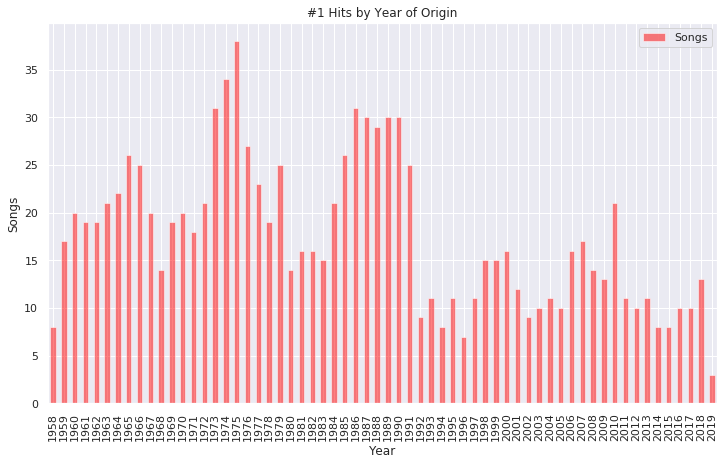

In [17]:
# histogram to map year against number of songs reaching number 1
data = {'Year': list(numOne.keys()), 'Songs': list(numOne.values())}
numOneDF = pd.DataFrame(data)
numOneDF = numOneDF.sort_values("Year")
numOneDF.plot(kind='bar', x= 'Year', y='Songs', color='red', alpha=0.5)
plt.savefig('YEARSx#SONGSREACHINGNUM1')
plt.ylabel('Songs')
plt.title('#1 Hits by Year of Origin')
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()

This histogram shows the distribution of songs as grouped by year, to see whatthe typical year has in terms of number of songs per year. The mean number of songs that hit #1 per year is 17.56, while the median is 16.


This skew is primarily due to the maximum of 38, which skews the data toward higher numbers of songs per year due to outlying years. The mode of 11 is extremely prevalent, with over 14% of all years containing exactly 11 #1 singles on the Billboard Top 100.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


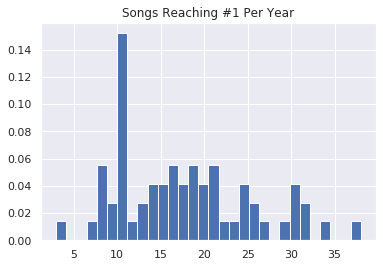

38

In [18]:
x = numOneDF['Songs']
plt.hist(x, normed=True, bins=30)
plt.savefig('YEARSx#SONGSREACHINGNUM1HIST')
plt.title("Songs Reaching #1 Per Year")
plt.show()
x.max()

This data illustrates the mapping of each year (on the x axis) to the number of songs with more than one instance of appearing on the Billboard Weekly Top 100. Songs that are extremely popular by this metric are therefore becoming increasingly more common as time goes on, as demonstrated by the sharp rise since the mid-1970s (in which appeared very few songs with more than one instance).


Another factor at play here is the resurgence of many songs, as mainstream fascination with past culture has seen a heighted presence in recent years. For instance, popular songs by ABBA and The Beatles have had resurgences in recent years, demonstrating the enduring nature of music and artists who have remained relevant to the public eye.
An additional factor in recurring songs is that holiday songs, such as Christmas or Halloween songs, have a sharp seasonal ebb and flow that would lend themselves toward higher representation on these lists. Because they regain spots on the list seasonally, they would be more highly represented here than a song that is extremely popular but fades in popularity eventually without resurgence.


Factors to explore in the future include the high density of songs that have seen resurgences peaking in the early 1960s.

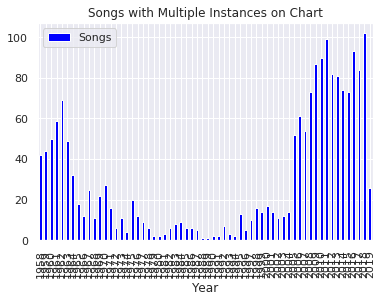

In [22]:
data = {'Year': list(yearToInstance.keys()), 'Songs': list(yearToInstance.values())}
yearInstanceDF = pd.DataFrame(data)
yearInstanceDF = yearInstanceDF.sort_values("Year")
yearInstanceDF.plot(kind='bar', x= 'Year', y='Songs', color='blue')
plt.savefig('YEARSxMUL_INSTANCES')
plt.title("Songs with Multiple Instances on Chart")
plt.show()

------

Now let's take a look at the nationality distribution to the Billboard top 100 songs.

We split up the nationality distribution into decades and split them into three big timelines: 1950s-1970s, 1980s-1990s, and 2000s-2010s.

The below pie chart describes the nationalities of all the artists on the Billboard Top 100 for the decades 1950s-1960s.

These are visualizations of the nationalities of the performers of the songs that have reached the Billboard Top 100 for the three splits from 1950s-2010s. It is separated into three different intervals of decades where the first visualization is 1950s-1970s, second is 1980s-1990s, and third is 2000s-2010s. As we can see, what stayed the same through all these decades is that a majority of the artists that were on the Billboard Top 100 were American unsurprisingly. Since the Billboard charts ranks songs according to sales, streams or airplay, and from the main song charts in the United States, it is no surprise that throughout the decades, American artists stayed as a strong prominent portion of the Billboard charts. 

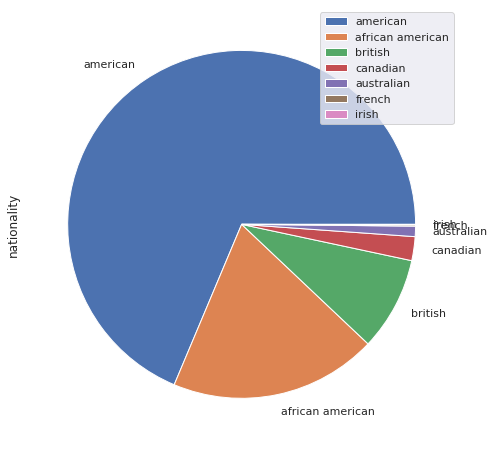

In [23]:
fifty_seventy_dec = merge_bboard_gender_df[(merge_bboard_gender_df.Decade == 1950)|(merge_bboard_gender_df.Decade == 1960)|(merge_bboard_gender_df.Decade == 1970)]
fsd_vals = fifty_seventy_dec['nationality'].value_counts().to_frame()
fsd_cat = fifty_seventy_dec['nationality'].value_counts().index.tolist()
fsd_vals.plot.pie(y='nationality', figsize=(8,8))

Below is the pie chart for the decades 1980s to 1990s.

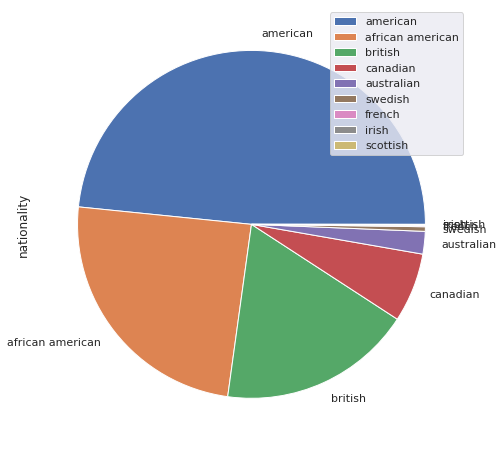

In [24]:
eighty_ninety_dec = merge_bboard_gender_df[(merge_bboard_gender_df.Decade == 1980)|(merge_bboard_gender_df.Decade == 1990)]
end_vals = eighty_ninety_dec['nationality'].value_counts().to_frame()
end_cat = eighty_ninety_dec['nationality'].value_counts().index.tolist()
end_vals.plot.pie(y='nationality', figsize=(8,8))

Below is the pie chart for the decades 2000s to 2010s.

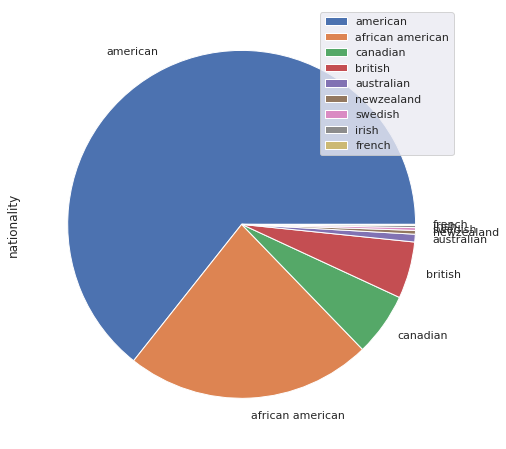

In [26]:
two_thousands_dec = merge_bboard_gender_df[(merge_bboard_gender_df.Decade == 2000)|(merge_bboard_gender_df.Decade == 2010)]
ttd_vals = two_thousands_dec['nationality'].value_counts().to_frame()
ttd_cat = two_thousands_dec['nationality'].value_counts().index.tolist()
ttd_vals.plot.pie(y='nationality', figsize=(8,8))

Interestly, we can notice that there was a surge of African American and British artists during the 1980s-1990s. This is most likely due to the fact that in the beginning of 1980s, the trend of disco started to fall and music genres like rock gained more and more attention across the United States. This rise of rock help contribute to the rise of European artists on the Billboard. For example, some of the most popular artists of the 1980s decade included Queen, Def Leppard, and The Rolling Stones, which are all British/English rock bands. During these two decades, some of these British acts managed to outsell American artists, giving rise to the “Second British Invasion”. Some songs that stayed prominent on the chart included “Another One Bites the Dust” by Queen and “Love Bites” by Def Leppard. “Another One Bites the Dust” peaked to #1 for three weeks and stayed on the Billboard chart for 31 weeks in the 1980s. “Love Bites” peaked to #1 for one week and stayed on the Billboard charts for 23 weeks in the 1980s.

Cultural aspects from the African American communities had a strong influence on the popular music in the 1980s which carried all way through into the 1990s. Some of these cultural aspects included hip-hop, rap music, and break dancing. These aspects influenced the pop and R&B music which rose up into the Billboard top charts. The rise of these genres also brought in the dancibility and use of the rhythm of the body in the songs. Very prominent artists that dominated the charts included Michael Jackson, Prince, Whitney Houston, and Lionel Richie. These artists were prominent figures of the music industry in the United States and they stayed significant all the way into the 1990s. For example, Michael Jackson’s Thriller album released in 1982 became the best-selling album of all time selling 25 million copies during that decade. His later album, Bad, released in 1987, became the first album in history to have five number-one singles on Billboard Hot 100. With the rise of a new wave of popular music such as hip hop, rock, and pop, this brought in new artists of different nationalities that populated the Billboard charts.

To generalize, above three pie charts are visualizations of the nationalities of the performers of the songs that have reached the Billboard Top 100 for the three sections of decades. It is separated into three different intervals of decades where the first visualization is 1950s-1970s, second is 1980s-1990s, and third is 2000s-2010s. As we can see, what stayed the same through all these decades is that a majority of the artists that were on the Billboard Top 100 were American unsurprisingly. Since the Billboard charts ranks songs according to sales, streams or airplay, and from the main song charts in the United States, it is no surprise that throughout the decades, American artists stayed as a strong prominent portion of the Billboard charts.

------

Now, let's look at some of the music attributes from the popular songs.


The below graphs show the different attributes to popular songs from 7 decades. It shows what kind of features contribute to a song's success. We can see that danceability, valance, and energy remain relatively high throughout the decades, while acousticness varies, and speechiness stays low. 

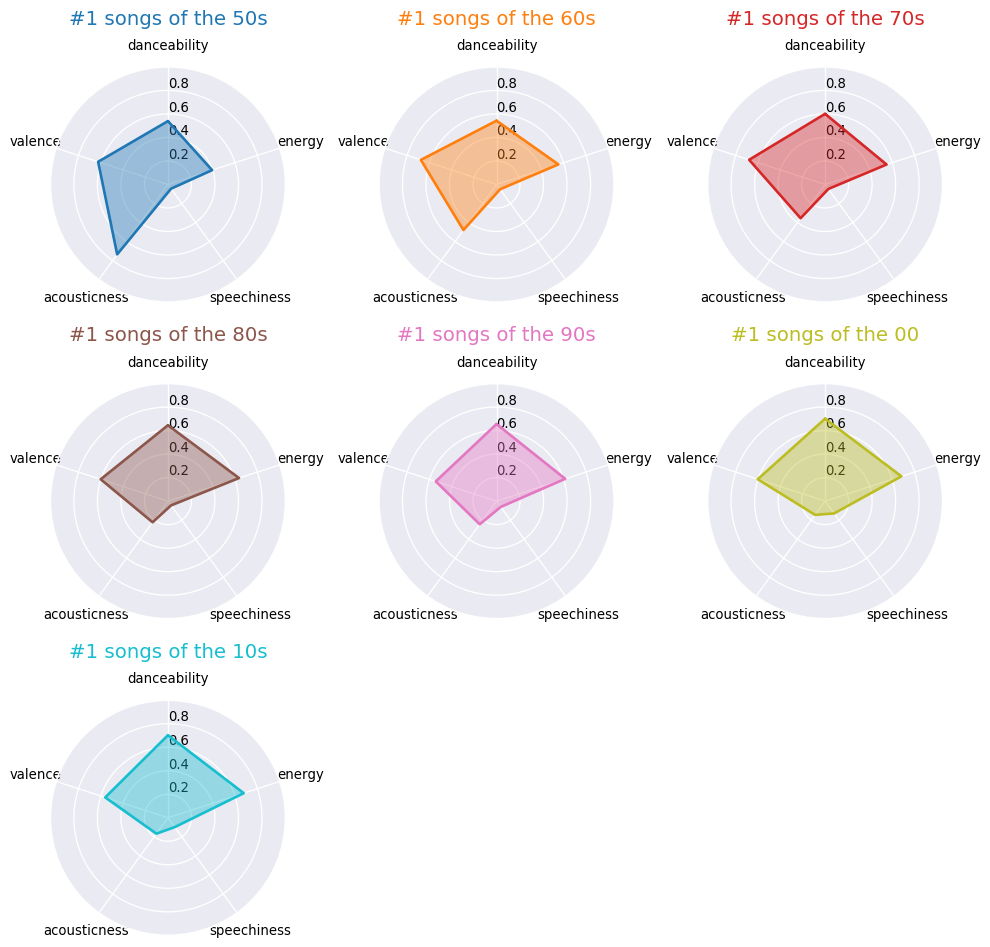

In [28]:
#create data frame for all of the means for all of the decades to be plotted
plot_df = pd.DataFrame({
'year': ['50s','60s','70s','80s', '90s', '00', '10s'],
'danceability': [dance50, dance60, dance70, dance80, dance90, dance00, dance10],
'energy': [energy50, energy60, energy70, energy80, energy90, energy00, energy10],
'speechiness': [speech50, speech60, speech70, speech80, speech90, speech00, speech10],
'acousticness': [acoustic50, acoustic60, acoustic70, acoustic80,acoustic90, acoustic00, acoustic10],
'valence': [valence50, valence60, valence70, valence80, valence90, valence00, valence10]
})

def make_radar(row, title, color):
     
    #number of attributes for graph
    categories=list(plot_df)[1:]
    N = len(categories)
 
    #size of the angle for each wedge
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider subplot
    ax = plt.subplot(3,3,row+1, polar=True, )
    plt.tight_layout()

    # setting the first axis to the top
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Each attribute gats an axis and a label
    plt.xticks(angles[:-1], categories, color='black', size=10)

    # actual plotting
    values=plot_df.loc[row].drop('year').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Drawing the y axis labels
    ax.set_rlabel_position(0)
    plt.yticks(np.arange(0, 1, step=0.2), ['', '0.2', '0.4', '0.6', '0.8'], color="black", size=10)
    plt.ylim(0,1)

    # Adding a title
    plt.title(title, size=15, color=color, y=1.15)
    
# creating and initializing the plot with resolution
my_dpi=95
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Crafting a color palette
my_palette = plt.cm.get_cmap('tab10', len(plot_df.index))
 
# Looping through dataframe to plot
for row in range(0, len(plot_df.index)):
    make_radar( row=row, title='#1 songs of the '+ plot_df['year'][row], color=my_palette(row))

------

The gender distribution of artists across the Billboard Hot 100 changed as time passed. In the 51 years we analyzed, male artists comprised 65.7% of artists in the top 100, while female artists only made up 34.3% of artists. 

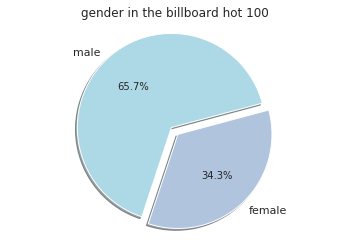

In [31]:
gender = [15236,7941] # TODO can we hardcode this?
my_labels = 'male','female',
my_colors = ['lightblue','lightsteelblue']
my_explode = (0.1, 0)
plt.pie(gender, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('gender in the billboard hot 100')
plt.axis('equal')
plt.show()

In [35]:
# merge two datasets

#dfGenMus = pd.merge(dfGender,(simpBillboardDF[['Performer', 'WeekID']]), on='Performer')
#dfGenMus.head()
#TODO can't compile

In [36]:
#ax = df.plot.bar(rot=0)

# Ethics & Privacy

Briefly acknowledge and address any potential issues of ethics and privacy for the proposed project. In particular: 
- Did you have permission to use this data, for this purpose? 
- Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with? 
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?) 
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact? 
- How did you handle issues you identified? (1-2 paragraphs) 

Because the Billboard Top 100 represents the songs that are most popular based on play time and sales within the United States, there may be biases within the data that reflect biases of western society at each point. The bias may lie within how Billboard algorithmically rank the songs on their charts. We also recognize that we are approaching this project from the standpoint of college students, who do not represent the whole population of music listeners. As we continue in this project, we will continue to consider and take note of any additional ethical considerations that crop up. As all of our data is publically available, it doesn't seem to have information that may violate any privacy concerns such as the policies of personally  identifiable information.

Another ethical issue to consider when studying the gender of artists is our society’s changing attitude toward gender and growing acceptance of gender fluidity and nonbinary artists. For example, in 2019 Sam Smith came out as nonbinary. However the dataset we worked with only listed two genders: male and female, which reflects damaging human biases. As a result of this bias, nonbinary and genderfluid artists, like Sam Smith, were misgendered in our project. While the gender binary was the only information available in our dataset for the gender portion of this project, it is important to note the importance of correctly gendering all artists. As data scientists, we acknowledge this failure of inclusivity in our data, and in the future would hope that all genders are included in studies like this one. 

# Conclusion & Discussion

Discuss your project. Summarize your data and question. Briefly describe your analysis. Summarize your results and conclusions. Be sure to mention any limitations of your project. Discuss the impact of this work on society. (2-3 paragraphs)



As a group, we chose to look at four separate aspects of the songs that appeared on the Billboard Hot 100: virality and #1 hits, nationality and globalization of popular music, specific attributes of popular songs, and the gender distribution for artists that make it onto the Billboard Hot 100. We found that viral songs became more popular in recent years as there were fewer #1 hits per year as individual songs dominated the charts, illustrating the influence that social media has has on society. In terms of the nationalities, our findings aligned with what was discussed in the background as there was a surge of African American artists that charted the Billboard Hot 100 in the recent decades. Their influence in their music carried on until now. It was expected that the overall majority of the artists that charted were American artists. Additionally, we found that a song's popularity can be predicted by how "dancable" it is throughout the decades, but as music technology changes and the ease of streaming allowed a diverse range of genres to gain prominence, the features of a song such as acousticness and lack of speechiness have become less indicative of their success. Lastly, we can see that the gender gap did decrease slightly since the 1960s until now. In the 1960s there were more than doubled the songs performed by male artists than female artists. Interestingly, that gap became very small in the 1990s where it was almost an even split between male and female artists and slowly increased as we get into more recent decades. 

Thus, our hypothesis seems to be somewhat correct. Although we did not see a rising of more global artists, we did see a surge of African American artists dominating and maintaining their positions in the Billboard charts. In the recent years, there has been an increase divide between popular, viral songs as usual indicators of a successful song has become less and less of an indicator while other features such as "dancability" rose. There was a fluctuation in the gender gap between artists as it started with a really big difference, slowly closed up until the 1990s and then slowly diverged again. 

In terms of some limitations, we were limited to analyzing gender of the artists as just male and female given our dataset that we found, which dismisses artists who identify as nonbinary such as Sam Smith. Another aspect that we could not measure much of was rise of more globalized artists such as Luis Fonsi's "Despacito" or PSY's "Gangnam Style" as those were more of just viral songs that peaked for a short amount of time and thus was undermined by other lasting songs. In terms of how our study can impact society is that we have displayed how songs can reflect the culture and trends of that certain decade or time period. In the 1980s and 1990s, there were a lot of influence from African American culture, which influenced heavily the songs that charted the Billboard. In recent years, the concept of becoming viral has been a big thing and there has been a rise of viral songs that peaked the Billboard charts for a short time as that song's virality rises and drop.